Importar las librerias.

In [124]:
import pandas as pd
import numpy as np
import itertools


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import os


Cargar la base de datos de la práctica.

In [125]:
data_bruto = pd.read_csv('data.csv')

**Preprocesaamiento de los datos**


Muestre la información de las columnas y el recuento de los valores a null en cada columna.


In [126]:
print('Valores de null:\n', data_bruto.isnull().sum())


Valores de null:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wor

Eliminar los valores NaN.


In [127]:
data_clean = data_bruto.iloc[:,:-1]


Verificar de nuevo los valores a null.


In [128]:
print('Valores de null:\n', data_clean.isnull().sum())

Valores de null:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Ver la información de los datos.

In [129]:
data_clean.describe(include = 'all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


Muestra la información de los datos que estamos usando: como es el tipo de dato de cada variable, el peso del fichero, entre otros.


In [130]:
print(data_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Muestra la información en forma de histograma de la variable a predecir, para saber si los datos estan desbalanceados. En este caso aunque existe una mayor representación de las muestras de la clase 0, no esta muy desbalanceado.

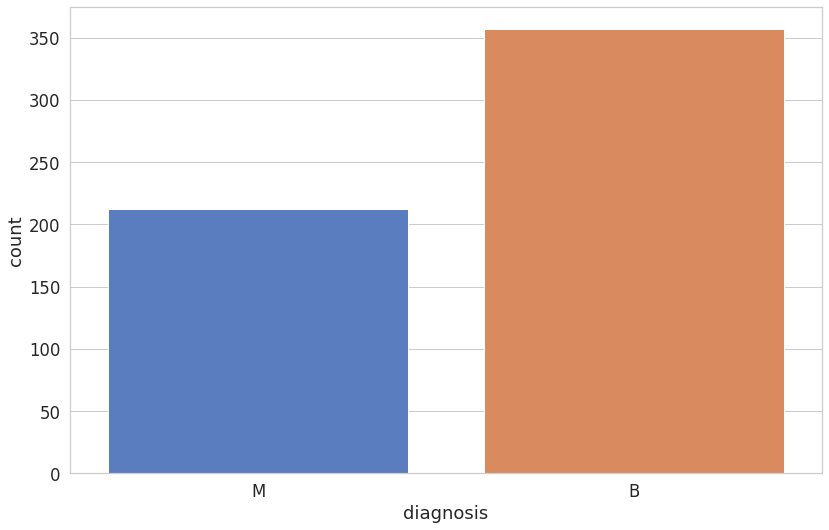

In [131]:
sns.countplot(x='diagnosis',data=data_clean)
plt.show()


Remplazar los valores categoricos por numeros para ayudar al clasificador. El valor de M por el valor 0 y el valor B por el valor 1.


In [132]:
data_clean["diagnosis"][data_clean["diagnosis"]=='M'] = 0
data_clean["diagnosis"][data_clean["diagnosis"]=='B'] = 1


Verificar de nuevo ejecutando el histograma.


Representación de las variables junto con los histogramas de algunas etiquetas


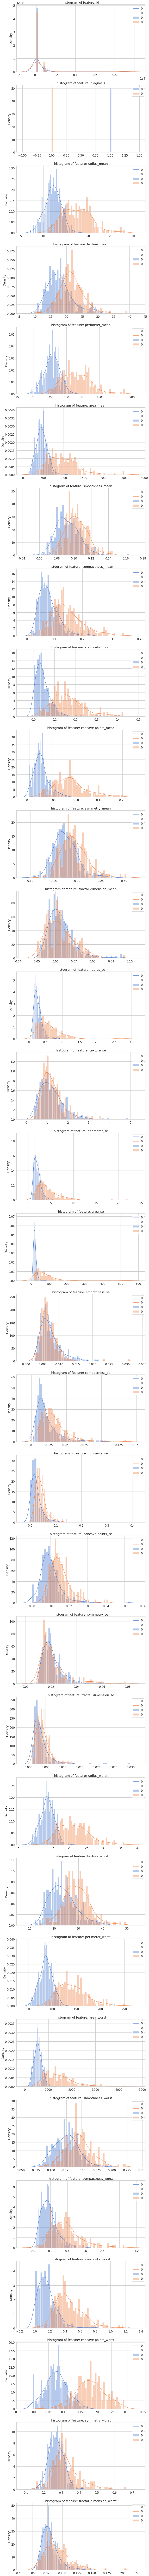

In [133]:
columns=data_clean.columns
plt.figure(figsize=(12,32*8))
gs = gridspec.GridSpec(32, 1)
for i, cn in enumerate(data_clean[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_clean[cn][data_clean.diagnosis == 1], bins=50)
    sns.distplot(data_clean[cn][data_clean.diagnosis == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(data_clean["diagnosis"])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()


Mapa de calor con las principales etiquetas y la correlacion entre ellas.




Text(0.5, 1.05, 'Correlation de las etiquetas')

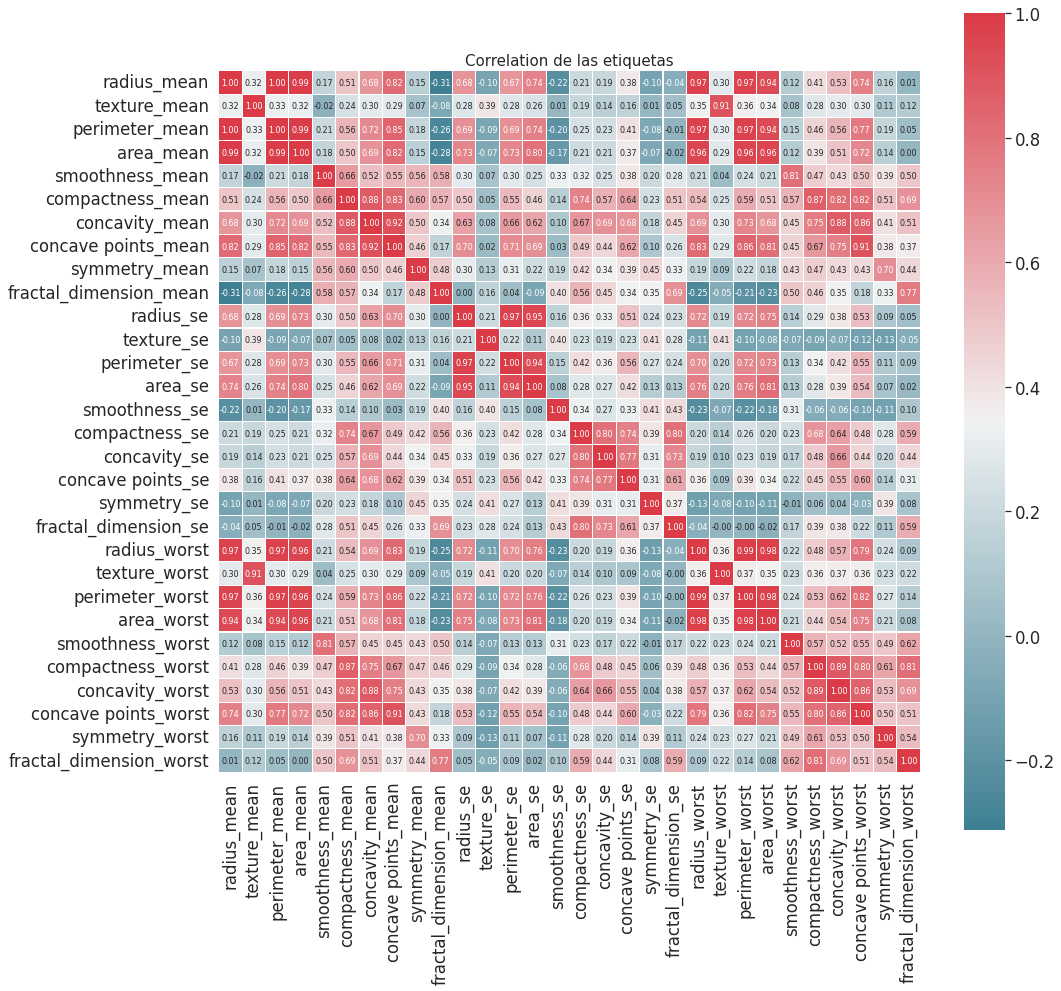

In [134]:
corr = data_clean.iloc[:,2:].corr() #eliminando lso valores de id y diagnosis
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation de las etiquetas', y=1.05, size=15)

**Fase de contrucción de los modelos y calibración de la calidad de los modelos**

Importar las librerias.

In [135]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


Preparar los datos de entrenamientos y test.


In [136]:
data_clean = data_clean.iloc[:,1:] #eliminar el valor de id

train,test=train_test_split(data_clean,test_size=0.25,random_state=0)# stratify the outcome


print("Training Data :",train.shape)
print("Testing Data :",test.shape)

train_X=train.iloc[:,1:]#eliminar el valor de diagnosis
test_X=test.iloc[:,1:] #eliminar el valor de diagnosis

train_Y=train['diagnosis']
test_Y=test['diagnosis']
train_Y=train_Y.astype('int')
test_Y=test_Y.astype('int')

Training Data : (426, 31)
Testing Data : (143, 31)


Centrado y normalizado de las características.


In [137]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

# Training Data
train_X = MinMaxScaler().fit_transform(train_X)
print("Training Data :", train_X.shape)

# Testing Data
test_X = MinMaxScaler().fit_transform(test_X)
print("Testing Data :", test_X.shape)



Training Data : (426, 30)
Testing Data : (143, 30)


Librerias para poder tener los valores de calidad de los modelos.


In [138]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

Preparar los clasificadores para la comparativa.


In [139]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)


Representar la curva ROC de los modelos en una misma gráfica para evaluarlos. 
Los dos modelos mejores modelos en lo que respecta a la comparativa en curva ROC son el SVM Lineal y el modelo basado en la regresión logística. Los valores de área bajo la curva también son altos, los máas cercanos a uno (con un valor de 0,997 y 0,996, respectivamente).
En este caso el modelo con peores prestaciones el árbol de decisión (con un valor de área bajo la curva 0,701). 

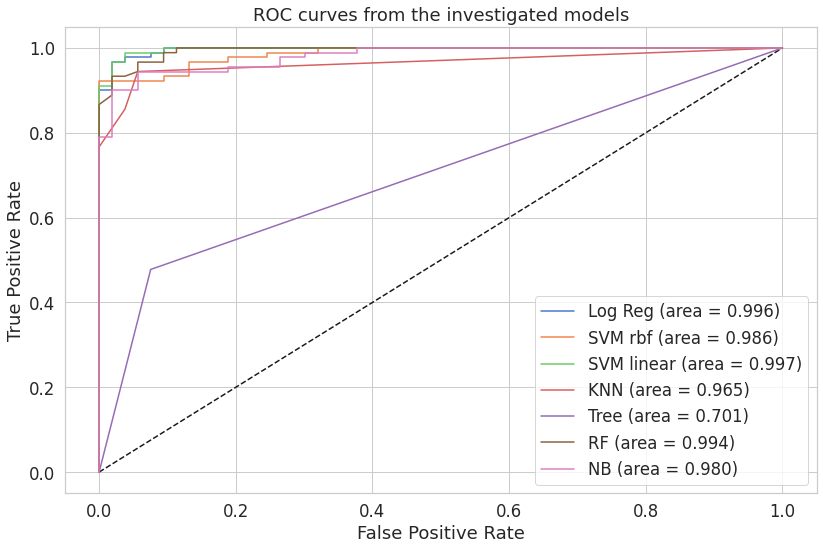

In [140]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()


Representación de la curva de precisión respecto del recall. En este caso esta segunda curva refuta las conclusiones obtenidas en la comparativa anterior, respecto de los modelos. Aunque en este caso se evalúan métricas distintas comparando el valor de *recall*.


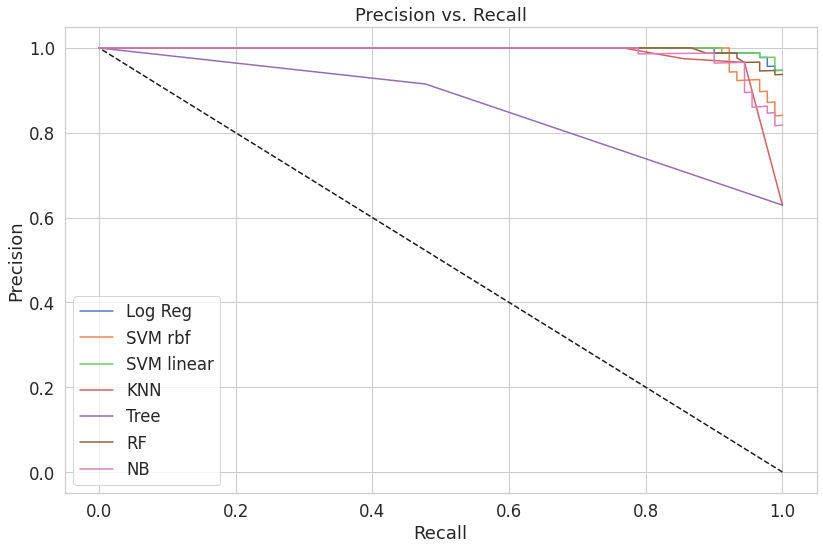

In [141]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()